In [1]:
from collections import Counter
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

In [2]:
!pip install lightgbm datasets

In [23]:
df_mal_1 = pd.read_csv('./Data/eth_ransom.csv')
df_mal_1 = df_mal_1[['text']]
df_mal_1['malicious'] = 1
df_mal_1

text  malicious
0   function transferFrom(address _from, address _...          1
1   function transferFrom(address _from, address _...          1
2   function transferFrom(IERC20Token _token, addr...          1
3   function transferFrom(address sender, address ...          1
4   function transferFrom(address _from, address _...          1
..                                                ...        ...
75  function transferFrom(address sender, address ...          1
76  function transferFrom(address _from, address _...          1
77  function transferFrom(address sender, address ...          1
78   function transfer(address _to, uint256 _value...          1
79  function transferFrom(\r\n        address _fro...          1

[80 rows x 2 columns]

In [24]:
df_mal_2 = pd.read_csv('./Data/eth_scam.csv')
df_mal_2 = df_mal_2[['text']]
df_mal_2['malicious'] = 1
df_mal_2

text  malicious
0   function transferFrom(address _from, address _...          1
1   function transferFrom(address from, address to...          1
2   function transferFrom(address from, address to...          1
3   function transferFrom(\n        address from,\...          1
4   function transferFrom(\n        address sender...          1
5   function transferFrom(\r\n    address _from,\r...          1
6   function transferFrom(address _from, address _...          1
7   function transferFrom(address from, address to...          1
8   function transferFrom(address sender, address ...          1
9   function transferFrom(\r\n        address from...          1
10  function transferFrom(address from, address to...          1
11  function transferFrom(address _from, address _...          1
12  function transferFrom(address from, address to...          1
13  function transferFrom(address _from, address _...          1
14  function transferFrom(address from, address to...          1
15  function transferFrom(\n        address from,\...          1

In [25]:
res = pd.concat([df_mal_1, df_mal_2])
res

text  malicious
0   function transferFrom(address _from, address _...          1
1   function transferFrom(address _from, address _...          1
2   function transferFrom(IERC20Token _token, addr...          1
3   function transferFrom(address sender, address ...          1
4   function transferFrom(address _from, address _...          1
..                                                ...        ...
11  function transferFrom(address _from, address _...          1
12  function transferFrom(address from, address to...          1
13  function transferFrom(address _from, address _...          1
14  function transferFrom(address from, address to...          1
15  function transferFrom(\n        address from,\...          1

[96 rows x 2 columns]

In [26]:
df_no_mal = pd.read_csv('./Data/eth_correct.csv')
df_no_mal.drop_duplicates()
df_no_mal = df_no_mal[['text']]
df_no_mal = df_no_mal.sample(n=100)
df_no_mal['malicious'] = 0
df_no_mal

text  malicious
87   function transferFrom(address _from, address _...          0
388  function transferFrom(\r\n    address from,\r\...          0
432  function transferFrom(address sender, address ...          0
221  function transferFrom(address from, address to...          0
140  function transferFrom(\r\n    address _from,\r...          0
..                                                 ...        ...
65   function transferFrom(address src, address dst...          0
184  function transferFrom(\r\n        address send...          0
59   function transferFrom(address _from, address _...          0
478  function transferFrom(address src, address dst...          0
460  function transferFrom(address _from, address _...          0

[100 rows x 2 columns]

In [27]:
df = pd.concat([res, df_no_mal])
df

text  malicious
0    function transferFrom(address _from, address _...          1
1    function transferFrom(address _from, address _...          1
2    function transferFrom(IERC20Token _token, addr...          1
3    function transferFrom(address sender, address ...          1
4    function transferFrom(address _from, address _...          1
..                                                 ...        ...
65   function transferFrom(address src, address dst...          0
184  function transferFrom(\r\n        address send...          0
59   function transferFrom(address _from, address _...          0
478  function transferFrom(address src, address dst...          0
460  function transferFrom(address _from, address _...          0

[196 rows x 2 columns]

In [28]:
from langchain_community.embeddings.gigachat import GigaChatEmbeddings
import numpy as np

embeddings = GigaChatEmbeddings(credentials="ZDRmM2MzOGUtMDBkOS00YzIzLTliOTEtZTQ1MmJlYmY3MjI2OjI4MDM5Mjg3LTJjOWUtNGQ0MC05OTcxLTYzMmI3NDQwOTNiOA==", verify_ssl_certs=False)

def get_giga_emb(text):
    return np.array(embeddings.embed_documents(texts=[text[:512]])[0])

df['embdings'] = df['text'].apply(get_giga_emb)
df

text  malicious  \
0    function transferFrom(address _from, address _...          1   
1    function transferFrom(address _from, address _...          1   
2    function transferFrom(IERC20Token _token, addr...          1   
3    function transferFrom(address sender, address ...          1   
4    function transferFrom(address _from, address _...          1   
..                                                 ...        ...   
65   function transferFrom(address src, address dst...          0   
184  function transferFrom(\r\n        address send...          0   
59   function transferFrom(address _from, address _...          0   
478  function transferFrom(address src, address dst...          0   
460  function transferFrom(address _from, address _...          0   

                                              embdings  
0    [0.8568639159202576, 0.3303128778934479, -0.53...  
1    [0.7098633050918579, -0.13596680760383606, -0....  
2    [0.5073968172073364, 0.4963860511779785, -0.45...  
3    [-0.05863800272345543, -0.04794730991125107, 0...  
4    [0.36675912141799927, -0.016682736575603485, -...  
..                                                 ...  
65   [0.11822662502527237, 0.06578630208969116, -0....  
184  [0.08702081441879272, 0.32442885637283325, -0....  
59   [0.3449994623661041, 0.012878850102424622, 0.0...  
478  [0.21481171250343323, 0.10601261258125305, -0....  
460  [0.36675912141799927, -0.016682736575603485, -...  

[196 rows x 3 columns]

In [39]:
df

text  malicious  \
0    function transferFrom(address _from, address _...          1   
1    function transferFrom(address _from, address _...          1   
2    function transferFrom(IERC20Token _token, addr...          1   
3    function transferFrom(address sender, address ...          1   
4    function transferFrom(address _from, address _...          1   
..                                                 ...        ...   
65   function transferFrom(address src, address dst...          0   
184  function transferFrom(\r\n        address send...          0   
59   function transferFrom(address _from, address _...          0   
478  function transferFrom(address src, address dst...          0   
460  function transferFrom(address _from, address _...          0   

                                              embdings  \
0    [0.8568639159202576, 0.3303128778934479, -0.53...   
1    [0.7098633050918579, -0.13596680760383606, -0....   
2    [0.5073968172073364, 0.4963860511779785, -0.45...   
3    [-0.05863800272345543, -0.04794730991125107, 0...   
4    [0.36675912141799927, -0.016682736575603485, -...   
..                                                 ...   
65   [0.11822662502527237, 0.06578630208969116, -0....   
184  [0.08702081441879272, 0.32442885637283325, -0....   
59   [0.3449994623661041, 0.012878850102424622, 0.0...   
478  [0.21481171250343323, 0.10601261258125305, -0....   
460  [0.36675912141799927, -0.016682736575603485, -...   

                                      malicious_target  
0    [1.8568639159202576, 1.3303128778934479, 0.460...  
1    [1.709863305091858, 0.8640331923961639, 0.6964...  
2    [1.5073968172073364, 1.4963860511779785, 0.545...  
3    [0.9413619972765446, 0.9520526900887489, 1.224...  
4    [1.3667591214179993, 0.9833172634243965, 0.702...  
..                                                 ...  
65   [0.11822662502527237, 0.06578630208969116, -0....  
184  [0.08702081441879272, 0.32442885637283325, -0....  
59   [0.3449994623661041, 0.012878850102424622, 0.0...  
478  [0.21481171250343323, 0.10601261258125305, -0....  
460  [0.36675912141799927, -0.016682736575603485, -...  

[196 rows x 4 columns]

In [40]:
data = pd.DataFrame(columns=[i for i in range((1024))])

for emb in np.array(df['embdings']):
    data.loc[len(data)] = emb
    
data

0         1         2         3         4         5         6     \
0    0.856864  0.330313 -0.539852 -0.917193  1.507089 -0.324373 -0.177880   
1    0.709863 -0.135967 -0.303531 -1.080200  1.249494 -0.937675 -0.157065   
2    0.507397  0.496386 -0.454022 -0.775944  0.688716 -0.168420 -0.763526   
3   -0.058638 -0.047947  0.224641 -1.081770  0.963916 -0.730636 -0.209808   
4    0.366759 -0.016683 -0.297170 -0.911282  1.230851 -0.638745 -0.205187   
..        ...       ...       ...       ...       ...       ...       ...   
191  0.118227  0.065786 -0.521549 -0.920282  1.202508 -0.125289 -0.784209   
192  0.087021  0.324429 -0.167382 -0.895897  0.996428 -0.508398 -0.467315   
193  0.344999  0.012879  0.016178 -0.842375  0.987904 -0.460944  0.079829   
194  0.214812  0.106013 -0.628816 -0.822320  1.114259 -0.107479 -0.798858   
195  0.366759 -0.016683 -0.297170 -0.911282  1.230851 -0.638745 -0.205187   

         7         8         9     ...      1014      1015      1016  \
0    2.315058  0.685641 -0.484984  ... -0.803328 -0.540534  1.118043   
1    2.002166  1.449626 -0.691404  ... -0.671682 -0.659381  1.178764   
2    2.069385  1.025355 -0.389961  ... -1.146241 -0.210595  1.218039   
3    2.131615  0.780488 -0.289786  ... -1.174677 -0.224882  0.986510   
4    1.909152  0.914476 -0.466798  ... -0.591326 -0.513656  1.036138   
..        ...       ...       ...  ...       ...       ...       ...   
191  1.963957  1.338120 -0.505137  ... -0.865167 -0.433322  1.263521   
192  1.973271  0.992470 -0.312701  ... -1.281263 -0.250987  1.148196   
193  1.923241  0.617161 -0.588973  ... -0.751661 -0.276778  1.086752   
194  1.973852  1.262306 -0.404394  ... -0.945753 -0.511444  1.335387   
195  1.909152  0.914476 -0.466798  ... -0.591326 -0.513656  1.036138   

         1017      1018      1019      1020      1021      1022      1023  
0   -0.125291 -0.332258  1.140211 -0.173924 -0.192730 -1.160559 -0.786650  
1   -0.220915  0.464927  0.787505 -0.073073 -0.494035 -0.943177 -0.501814  
2   -0.650687 -0.306974  1.170480  0.122778 -0.587693 -1.703069 -0.540291  
3   -0.483117 -0.166418  0.938238  0.227922 -0.228874 -1.335602 -0.160751  
4   -0.448708  0.124733  1.235096  0.184172 -0.312052 -1.267020 -0.070646  
..        ...       ...       ...       ...       ...       ...       ...  
191 -0.046207  0.366637  1.074448 -0.072186 -0.366017 -1.985755 -0.367605  
192 -0.412866 -0.461523  0.753814  0.242791 -0.515896 -1.576934 -0.774567  
193 -0.490686  0.013853  1.044556  0.230913 -0.307292 -1.308966 -0.530274  
194 -0.054480  0.199520  1.154321 -0.076019 -0.407849 -1.917710 -0.424509  
195 -0.448708  0.124733  1.235096  0.184172 -0.312052 -1.267020 -0.070646  

[196 rows x 1024 columns]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df['malicious'], test_size=0.3, random_state=777, stratify=df['malicious'])

In [43]:
from optuna.samplers import TPESampler
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, f1_score
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 800),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_depth": trial.suggest_int("max_depth", 2, 15),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 0.1),
        "is_unbalance": True,
        "boosting_type": trial.suggest_categorical("boosting_type", ["dart", "gbdt"]),
        "importance_type": trial.suggest_categorical("importance_type", ["split", "gain"])}
        
    model = lgb.LGBMClassifier(**params, random_state = 17)
    
    scores= []
    cv = KFold(n_splits = 4, shuffle = True)
    
    for train_idx, test_idx in cv.split(X_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_t, y_t = X_train.iloc[test_idx], y_train.iloc[test_idx]
        
        model.fit(X_tr, y_tr)
        preds = model.predict_proba(X_t)[:,1]
        #preds = model.predict(X_t)
        score = roc_auc_score(y_t, preds)
        scores.append(score / cv.n_splits)
    
    return sum(scores)

In [44]:
study = optuna.create_study(direction = "maximize", sampler=TPESampler())
study.optimize(objective, n_trials = 50)

[I 2024-05-18 21:01:36,007] A new study created in memory with name: no-name-6f435030-7fda-4955-bdd5-1999d5ba4ae1


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l1 is set=1.900033562213026e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.900033562213026e-08
[LightGBM] [Warning] lambda_l2 is set=1.4193138979925052e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4193138979925052e-06
[LightGBM] [Warning] bagging_fraction is set=0.9883509500783507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9883509500783507
[LightGBM] [Warning] feature_fraction is set=0.7202129821767798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7202129821767798
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value:

[I 2024-05-18 21:01:36,264] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 755, 'lambda_l1': 1.900033562213026e-08, 'lambda_l2': 1.4193138979925052e-06, 'num_leaves': 55, 'feature_fraction': 0.7202129821767798, 'bagging_fraction': 0.9883509500783507, 'bagging_freq': 6, 'min_child_samples': 57, 'max_depth': 14, 'learning_rate': 0.002375952652328533, 'boosting_type': 'gbdt', 'importance_type': 'split'}. Best is trial 0 with value: 0.5.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:36,650] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 665, 'lambda_l1': 0.8443575161459275, 'lambda_l2': 3.822110695511023, 'num_leaves': 95, 'feature_fraction': 0.7251462486683538, 'bagging_fraction': 0.45988455293066155, 'bagging_freq': 2, 'min_child_samples': 33, 'max_depth': 6, 'learning_rate': 0.06804277148239797, 'boosting_type': 'dart', 'importance_type': 'gain'}. Best is trial 0 with value: 0.5.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2024-05-18 21:01:36,947] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 676, 'lambda_l1': 3.7832782950213213, 'lambda_l2': 0.0004733285478686028, 'num_leaves': 29, 'feature_fraction': 0.6862678532511952, 'bagging_fraction': 0.8814394026847442, 'bagging_freq': 1, 'min_child_samples': 72, 'max_depth': 11, 'learning_rate': 0.06299780889670319, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 0 with value: 0.5.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:41,555] Trial 3 finished with value: 0.7498024703302373 and parameters: {'n_estimators': 613, 'lambda_l1': 0.011013477560865672, 'lambda_l2': 0.00012895975427124493, 'num_leaves': 44, 'feature_fraction': 0.6453047520032471, 'bagging_fraction': 0.4128451759147031, 'bagging_freq': 3, 'min_child_samples': 6, 'max_depth': 9, 'learning_rate': 0.07460412913474407, 'boosting_type': 'dart', 'importance_type': 'gain'}. Best is trial 3 with value: 0.7498024703302373.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:41,770] Trial 4 finished with value: 0.5 and parameters: {'n_estimators': 403, 'lambda_l1': 0.01390572678806847, 'lambda_l2': 0.15010511387310968, 'num_leaves': 129, 'feature_fraction': 0.6165797721240815, 'bagging_fraction': 0.6665671852370973, 'bagging_freq': 2, 'min_child_samples': 80, 'max_depth': 7, 'learning_rate': 0.05362368150505102, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 3 with value: 0.7498024703302373.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:42,037] Trial 5 finished with value: 0.5 and parameters: {'n_estimators': 331, 'lambda_l1': 7.493946707457233e-05, 'lambda_l2': 2.3512519078222626e-07, 'num_leaves': 99, 'feature_fraction': 0.9578312825517976, 'bagging_fraction': 0.4069143496690699, 'bagging_freq': 4, 'min_child_samples': 97, 'max_depth': 11, 'learning_rate': 0.025525594065530777, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 3 with value: 0.7498024703302373.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:42,544] Trial 6 finished with value: 0.5 and parameters: {'n_estimators': 711, 'lambda_l1': 0.0036622142083080895, 'lambda_l2': 3.790618806731837e-06, 'num_leaves': 169, 'feature_fraction': 0.7577119658535677, 'bagging_fraction': 0.5271093227622383, 'bagging_freq': 6, 'min_child_samples': 82, 'max_depth': 10, 'learning_rate': 0.0760534537126364, 'boosting_type': 'dart', 'importance_type': 'gain'}. Best is trial 3 with value: 0.7498024703302373.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:42,965] Trial 7 finished with value: 0.5 and parameters: {'n_estimators': 779, 'lambda_l1': 4.511127817501407e-07, 'lambda_l2': 1.3708809756120755e-07, 'num_leaves': 187, 'feature_fraction': 0.8789011398448158, 'bagging_fraction': 0.9360831648609418, 'bagging_freq': 7, 'min_child_samples': 100, 'max_depth': 9, 'learning_rate': 0.003658721504672898, 'boosting_type': 'gbdt', 'importance_type': 'split'}. Best is trial 3 with value: 0.7498024703302373.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:44,202] Trial 8 finished with value: 0.6997377185523332 and parameters: {'n_estimators': 755, 'lambda_l1': 0.015940792857994133, 'lambda_l2': 5.532038361987835e-05, 'num_leaves': 134, 'feature_fraction': 0.9955328074947274, 'bagging_fraction': 0.8434962400631905, 'bagging_freq': 5, 'min_child_samples': 43, 'max_depth': 7, 'learning_rate': 0.07760509864387946, 'boosting_type': 'gbdt', 'importance_type': 'split'}. Best is trial 3 with value: 0.7498024703302373.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[I 2024-05-18 21:01:46,187] Trial 9 finished with value: 0.7784350198412698 and parameters: {'n_estimators': 590, 'lambda_l1': 1.7151828691840952e-07, 'lambda_l2': 0.00014408961373358055, 'num_leaves': 206, 'feature_fraction': 0.48750562689478155, 'bagging_fraction': 0.40158449840596605, 'bagging_freq': 7, 'min_child_samples': 8, 'max_depth': 12, 'learning_rate': 0.035324058099166125, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 9 with value: 0.7784350198412698.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:46,682] Trial 10 finished with value: 0.7901596551933466 and parameters: {'n_estimators': 140, 'lambda_l1': 6.36933895910947e-06, 'lambda_l2': 0.007705929426379153, 'num_leaves': 256, 'feature_fraction': 0.40017572516129096, 'bagging_fraction': 0.6161614190437179, 'bagging_freq': 7, 'min_child_samples': 10, 'max_depth': 2, 'learning_rate': 0.031728287191067364, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:47,051] Trial 11 finished with value: 0.7417737644300144 and parameters: {'n_estimators': 124, 'lambda_l1': 4.32350066157442e-06, 'lambda_l2': 0.008803030589045486, 'num_leaves': 256, 'feature_fraction': 0.40087655821562285, 'bagging_fraction': 0.622362175919012, 'bagging_freq': 7, 'min_child_samples': 9, 'max_depth': 2, 'learning_rate': 0.031072889802904888, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:48,303] Trial 12 finished with value: 0.7509313364934074 and parameters: {'n_estimators': 533, 'lambda_l1': 2.130897543238937e-08, 'lambda_l2': 0.005890343433689737, 'num_leaves': 249, 'feature_fraction': 0.40076295111508253, 'bagging_fraction': 0.7762066917349288, 'bagging_freq': 6, 'min_child_samples': 23, 'max_depth': 2, 'learning_rate': 0.03883032144072362, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:48,698] Trial 13 finished with value: 0.7555584733893557 and parameters: {'n_estimators': 100, 'lambda_l1': 2.53548175749905e-06, 'lambda_l2': 0.014058517433806528, 'num_leaves': 210, 'feature_fraction': 0.5244157595480208, 'bagging_fraction': 0.5722322038649755, 'bagging_freq': 7, 'min_child_samples': 21, 'max_depth': 15, 'learning_rate': 0.019666124322100832, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:49,449] Trial 14 finished with value: 0.7871725185289427 and parameters: {'n_estimators': 253, 'lambda_l1': 4.524350340513312e-05, 'lambda_l2': 0.5140308356198369, 'num_leaves': 221, 'feature_fraction': 0.5003978116014572, 'bagging_fraction': 0.7389298785310341, 'bagging_freq': 5, 'min_child_samples': 20, 'max_depth': 13, 'learning_rate': 0.09756352405357153, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:50,022] Trial 15 finished with value: 0.7499634594680751 and parameters: {'n_estimators': 235, 'lambda_l1': 8.471068759564243e-05, 'lambda_l2': 6.310146280858517, 'num_leaves': 226, 'feature_fraction': 0.5226439422969222, 'bagging_fraction': 0.7478506833247963, 'bagging_freq': 5, 'min_child_samples': 27, 'max_depth': 4, 'learning_rate': 0.09225987805309736, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:50,323] Trial 16 finished with value: 0.6898067668966553 and parameters: {'n_estimators': 221, 'lambda_l1': 0.0005747277638414686, 'lambda_l2': 0.39604325737458096, 'num_leaves': 168, 'feature_fraction': 0.48050114731236904, 'bagging_fraction': 0.7144324132491016, 'bagging_freq': 4, 'min_child_samples': 42, 'max_depth': 13, 'learning_rate': 0.09724929349103546, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2024-05-18 21:01:50,993] Trial 17 finished with value: 0.7640822039600154 and parameters: {'n_estimators': 226, 'lambda_l1': 9.201598093165462e-06, 'lambda_l2': 0.17811668640230938, 'num_leaves': 228, 'feature_fraction': 0.583920551802854, 'bagging_fraction': 0.6539557950837673, 'bagging_freq': 5, 'min_child_samples': 18, 'max_depth': 4, 'learning_rate': 0.04726062010717498, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=9.201598093165462e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.201598093165462e-06
[LightGBM] [Warning] bagging_freq is

[I 2024-05-18 21:01:51,196] Trial 18 finished with value: 0.5 and parameters: {'n_estimators': 327, 'lambda_l1': 3.5525160570131243e-05, 'lambda_l2': 0.0022782821234235604, 'num_leaves': 167, 'feature_fraction': 0.4342685989760916, 'bagging_fraction': 0.8009447700745271, 'bagging_freq': 3, 'min_child_samples': 57, 'max_depth': 5, 'learning_rate': 0.018738677428870254, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:01:51,433] Trial 19 finished with value: 0.5992925111220959 and parameters: {'n_estimators': 172, 'lambda_l1': 0.0007256121737948757, 'lambda_l2': 1.2550511937527657e-08, 'num_leaves': 235, 'feature_fraction': 0.5639373563169658, 'bagging_fraction': 0.5937710709326357, 'bagging_freq': 6, 'min_child_samples': 38, 'max_depth': 15, 'learning_rate': 0.0852774823638817, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] lambda_l1 is set=0.0007256121737948757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007256121737948757
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5639373563169658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5639373563169658
[LightGBM] [Warning] bagging_fraction is set=0.5937710709326357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5937710709326357
[LightGBM] [Warning] lambda_l2 is set=1.2550511937527657e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2550511937527657e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l1 is set=0.0007256121737948757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007256121737948757
[LightGBM] [Warning] lambda_l2 is set=1.2550511937527657e-08, r

[I 2024-05-18 21:01:52,168] Trial 20 finished with value: 0.7413833180330955 and parameters: {'n_estimators': 314, 'lambda_l1': 0.35297975024461736, 'lambda_l2': 0.04991256104996491, 'num_leaves': 193, 'feature_fraction': 0.7959854487609767, 'bagging_fraction': 0.5268658057482205, 'bagging_freq': 5, 'min_child_samples': 17, 'max_depth': 8, 'learning_rate': 0.05454529135218049, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] lambda_l1 is set=0.35297975024461736, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35297975024461736
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7959854487609767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7959854487609767
[LightGBM] [Warning] bagging_fraction is set=0.5268658057482205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5268658057482205
[LightGBM] [Warning] lambda_l2 is set=0.04991256104996491, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04991256104996491
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=0.35297975024461736, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35297975024461736
[LightGBM] [Warning] lambda_l2 is set=0.04991256104996491, reg_lambda=0.0 wil

[I 2024-05-18 21:01:54,604] Trial 21 finished with value: 0.7569672089682105 and parameters: {'n_estimators': 487, 'lambda_l1': 5.90556567021243e-07, 'lambda_l2': 1.0811928466196601e-05, 'num_leaves': 211, 'feature_fraction': 0.46919926887314833, 'bagging_fraction': 0.5069958417995017, 'bagging_freq': 7, 'min_child_samples': 6, 'max_depth': 12, 'learning_rate': 0.03355062560427628, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:56,573] Trial 22 finished with value: 0.7630362692862692 and parameters: {'n_estimators': 553, 'lambda_l1': 1.6555887359928552e-07, 'lambda_l2': 0.0004536578715520402, 'num_leaves': 202, 'feature_fraction': 0.4842296787192758, 'bagging_fraction': 0.6986802729879046, 'bagging_freq': 6, 'min_child_samples': 13, 'max_depth': 13, 'learning_rate': 0.0438067082103168, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:57,056] Trial 23 finished with value: 0.6769880430242272 and parameters: {'n_estimators': 441, 'lambda_l1': 1.0475657962863835e-07, 'lambda_l2': 0.7760345916386254, 'num_leaves': 256, 'feature_fraction': 0.5396624591710442, 'bagging_fraction': 0.4655311085772131, 'bagging_freq': 7, 'min_child_samples': 31, 'max_depth': 12, 'learning_rate': 0.016216477917283968, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] lambda_l1 is set=1.0475657962863835e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0475657962863835e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5396624591710442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5396624591710442
[LightGBM] [Warning] bagging_fraction is set=0.4655311085772131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4655311085772131
[LightGBM] [Warning] lambda_l2 is set=0.7760345916386254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7760345916386254
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l1 is set=1.6486370557912233e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6486370557912233e-06
[LightGBM] [Warning] lambda_l2 is set=0.001052653178515671, reg_lam

[I 2024-05-18 21:01:57,804] Trial 24 finished with value: 0.7182593432109686 and parameters: {'n_estimators': 172, 'lambda_l1': 1.6486370557912233e-06, 'lambda_l2': 0.001052653178515671, 'num_leaves': 230, 'feature_fraction': 0.44735380666260555, 'bagging_fraction': 0.8608699884029247, 'bagging_freq': 6, 'min_child_samples': 14, 'max_depth': 13, 'learning_rate': 0.05903320629372659, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:01:58,115] Trial 25 finished with value: 0.5 and parameters: {'n_estimators': 284, 'lambda_l1': 2.0671825516062374e-05, 'lambda_l2': 1.4011863120225005, 'num_leaves': 146, 'feature_fraction': 0.6173528509554467, 'bagging_fraction': 0.5751185285700681, 'bagging_freq': 7, 'min_child_samples': 49, 'max_depth': 11, 'learning_rate': 0.04064631943745635, 'boosting_type': 'gbdt', 'importance_type': 'gain'}. Best is trial 10 with value: 0.7901596551933466.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28086
[LightGBM] [Info] Number of data points in the train set: 103, number of used features: 986
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504854 -> initscore=0.019418
[LightGBM] [Info] Start training from score 0.019418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

[I 2024-05-18 21:02:02,078] Trial 26 finished with value: 0.7936690046065046 and parameters: {'n_estimators': 385, 'lambda_l1': 1.0880255196426642e-07, 'lambda_l2': 0.050419855461173765, 'num_leaves': 188, 'feature_fraction': 0.5035526958524064, 'bagging_fraction': 0.7176000449157713, 'bagging_freq': 5, 'min_child_samples': 5, 'max_depth': 14, 'learning_rate': 0.02902712688735002, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:03,313] Trial 27 finished with value: 0.7399447278911565 and parameters: {'n_estimators': 387, 'lambda_l1': 0.00018773255575880998, 'lambda_l2': 0.028659288286520052, 'num_leaves': 236, 'feature_fraction': 0.4255695051959389, 'bagging_fraction': 0.7089740230294989, 'bagging_freq': 4, 'min_child_samples': 26, 'max_depth': 14, 'learning_rate': 0.010433039467790575, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:05,028] Trial 28 finished with value: 0.7537827846287144 and parameters: {'n_estimators': 269, 'lambda_l1': 9.647193664671362e-06, 'lambda_l2': 0.08184062543840633, 'num_leaves': 174, 'feature_fraction': 0.5223985057529804, 'bagging_fraction': 0.8086318552070598, 'bagging_freq': 3, 'min_child_samples': 12, 'max_depth': 15, 'learning_rate': 0.026987296745395836, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:05,242] Trial 29 finished with value: 0.5 and parameters: {'n_estimators': 166, 'lambda_l1': 5.847414138472719e-08, 'lambda_l2': 0.004174623233659302, 'num_leaves': 82, 'feature_fraction': 0.5987096023421827, 'bagging_fraction': 0.7531755768891432, 'bagging_freq': 5, 'min_child_samples': 65, 'max_depth': 14, 'learning_rate': 0.0479833674731992, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:02:06,352] Trial 30 finished with value: 0.7005482456140351 and parameters: {'n_estimators': 385, 'lambda_l1': 1.0455381728015819e-08, 'lambda_l2': 1.406573518839953, 'num_leaves': 3, 'feature_fraction': 0.6547639586154356, 'bagging_fraction': 0.6472422833210173, 'bagging_freq': 5, 'min_child_samples': 33, 'max_depth': 10, 'learning_rate': 0.0026001550635068593, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-05-18 21:02:09,326] Trial 31 finished with value: 0.7409352816086562 and parameters: {'n_estimators': 567, 'lambda_l1': 4.585959809702472e-07, 'lambda_l2': 3.472700645426828e-05, 'num_leaves': 215, 'feature_fraction': 0.49832503548316787, 'bagging_fraction': 0.955153524966275, 'bagging_freq': 4, 'min_child_samples': 8, 'max_depth': 12, 'learning_rate': 0.03631237039104148, 'boosting_type': 'gbdt', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:13,778] Trial 32 finished with value: 0.7904426353874884 and parameters: {'n_estimators': 454, 'lambda_l1': 3.7067436238945014e-08, 'lambda_l2': 0.015961088638342072, 'num_leaves': 188, 'feature_fraction': 0.45404966406273495, 'bagging_fraction': 0.6889601805213714, 'bagging_freq': 6, 'min_child_samples': 5, 'max_depth': 14, 'learning_rate': 0.02373938366554106, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=3.7067436238945014e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7067436238945014e-08
[LightGBM] [Warning] bagging_freq 

[I 2024-05-18 21:02:16,567] Trial 33 finished with value: 0.767037904905552 and parameters: {'n_estimators': 485, 'lambda_l1': 3.615212844947176e-08, 'lambda_l2': 0.027920660974034374, 'num_leaves': 188, 'feature_fraction': 0.44928601541177304, 'bagging_fraction': 0.6864904603653873, 'bagging_freq': 6, 'min_child_samples': 18, 'max_depth': 14, 'learning_rate': 0.026181440529557273, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] lambda_l1 is set=3.615212844947176e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.615212844947176e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.44928601541177304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44928601541177304
[LightGBM] [Warning] bagging_fraction is set=0.6864904603653873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6864904603653873
[LightGBM] [Warning] lambda_l2 is set=0.027920660974034374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027920660974034374
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=1.3680194915450373e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3680194915450373e-06
[LightGBM] [Warning] lambda_l2 is set=0.33113673020124085, reg_

[I 2024-05-18 21:02:19,133] Trial 34 finished with value: 0.7686994754041968 and parameters: {'n_estimators': 352, 'lambda_l1': 1.3680194915450373e-06, 'lambda_l2': 0.33113673020124085, 'num_leaves': 150, 'feature_fraction': 0.5712892022200656, 'bagging_fraction': 0.6117247637222726, 'bagging_freq': 5, 'min_child_samples': 5, 'max_depth': 13, 'learning_rate': 0.010188130896377549, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:21,541] Trial 35 finished with value: 0.7916061238736982 and parameters: {'n_estimators': 446, 'lambda_l1': 8.515458146258492e-06, 'lambda_l2': 0.0011274462173065365, 'num_leaves': 102, 'feature_fraction': 0.6983219899366233, 'bagging_fraction': 0.742870738446874, 'bagging_freq': 6, 'min_child_samples': 13, 'max_depth': 15, 'learning_rate': 0.06841635668949916, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 26 with value: 0.7936690046065046.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:23,816] Trial 36 finished with value: 0.8037489327281715 and parameters: {'n_estimators': 426, 'lambda_l1': 1.1004496555559654e-08, 'lambda_l2': 0.0020471429408279672, 'num_leaves': 92, 'feature_fraction': 0.7150232378210752, 'bagging_fraction': 0.6364335825015546, 'bagging_freq': 6, 'min_child_samples': 12, 'max_depth': 15, 'learning_rate': 0.02269489695296524, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:25,241] Trial 37 finished with value: 0.7785134887288249 and parameters: {'n_estimators': 453, 'lambda_l1': 2.425771190535598e-08, 'lambda_l2': 0.0010148272317102563, 'num_leaves': 107, 'feature_fraction': 0.7145972732151711, 'bagging_fraction': 0.6682504626528696, 'bagging_freq': 6, 'min_child_samples': 27, 'max_depth': 15, 'learning_rate': 0.06700369426725436, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:28,019] Trial 38 finished with value: 0.7732039049436268 and parameters: {'n_estimators': 509, 'lambda_l1': 1.3243322432222719e-07, 'lambda_l2': 0.0014747257573200483, 'num_leaves': 84, 'feature_fraction': 0.7795866694030625, 'bagging_fraction': 0.7945293990160639, 'bagging_freq': 6, 'min_child_samples': 15, 'max_depth': 15, 'learning_rate': 0.01136251978783084, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:33,153] Trial 39 finished with value: 0.7742868550134987 and parameters: {'n_estimators': 439, 'lambda_l1': 1.0490111547899355e-08, 'lambda_l2': 0.00027258877375797944, 'num_leaves': 52, 'feature_fraction': 0.8375894171243418, 'bagging_fraction': 0.7252415021542776, 'bagging_freq': 6, 'min_child_samples': 5, 'max_depth': 14, 'learning_rate': 0.024516005831609664, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:34,573] Trial 40 finished with value: 0.7184309172585444 and parameters: {'n_estimators': 412, 'lambda_l1': 6.057978416462244e-07, 'lambda_l2': 5.6697521700106844e-05, 'num_leaves': 113, 'feature_fraction': 0.6596674731894445, 'bagging_fraction': 0.8857700786840036, 'bagging_freq': 1, 'min_child_samples': 36, 'max_depth': 14, 'learning_rate': 0.0631907157052569, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:36,389] Trial 41 finished with value: 0.779676354347407 and parameters: {'n_estimators': 360, 'lambda_l1': 5.467132127564259e-08, 'lambda_l2': 0.0026954938016802506, 'num_leaves': 68, 'feature_fraction': 0.7384004634291366, 'bagging_fraction': 0.6335436158260782, 'bagging_freq': 6, 'min_child_samples': 11, 'max_depth': 3, 'learning_rate': 0.022469458732652842, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:40,070] Trial 42 finished with value: 0.7484680443384784 and parameters: {'n_estimators': 606, 'lambda_l1': 8.005243442811876e-06, 'lambda_l2': 0.011560769374823867, 'num_leaves': 123, 'feature_fraction': 0.6952391575507695, 'bagging_fraction': 0.6789049862034853, 'bagging_freq': 7, 'min_child_samples': 11, 'max_depth': 6, 'learning_rate': 0.028082589079207416, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] lambda_l1 is set=8.005243442811876e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.005243442811876e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6952391575507695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6952391575507695
[LightGBM] [Warning] bagging_fraction is set=0.6789049862034853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6789049862034853
[LightGBM] [Warning] lambda_l2 is set=0.011560769374823867, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011560769374823867
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l1 is set=2.293737768647127e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.293737768647127e-07
[LightGBM] [Warning] lambda_l2 is set=0.0913294220045649, reg_lambd

[I 2024-05-18 21:02:42,608] Trial 43 finished with value: 0.7142462148336208 and parameters: {'n_estimators': 684, 'lambda_l1': 2.293737768647127e-07, 'lambda_l2': 0.0913294220045649, 'num_leaves': 91, 'feature_fraction': 0.889024504151406, 'bagging_fraction': 0.5584288953045329, 'bagging_freq': 6, 'min_child_samples': 22, 'max_depth': 8, 'learning_rate': 0.013860947607735194, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:44,698] Trial 44 finished with value: 0.773295901500435 and parameters: {'n_estimators': 462, 'lambda_l1': 5.908563136110111e-08, 'lambda_l2': 0.02071509191674932, 'num_leaves': 66, 'feature_fraction': 0.6773473923565541, 'bagging_fraction': 0.6091238900547828, 'bagging_freq': 7, 'min_child_samples': 15, 'max_depth': 15, 'learning_rate': 0.03253367466611154, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:48,270] Trial 45 finished with value: 0.7933890670732777 and parameters: {'n_estimators': 516, 'lambda_l1': 1.2269536626752611e-06, 'lambda_l2': 0.00045876632395234373, 'num_leaves': 136, 'feature_fraction': 0.6289245319219517, 'bagging_fraction': 0.7691311858566586, 'bagging_freq': 7, 'min_child_samples': 9, 'max_depth': 11, 'learning_rate': 0.05326937092403908, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:48,619] Trial 46 finished with value: 0.5 and parameters: {'n_estimators': 524, 'lambda_l1': 1.1769535976820394e-06, 'lambda_l2': 0.0005987087001584488, 'num_leaves': 145, 'feature_fraction': 0.6298480270400425, 'bagging_fraction': 0.7615377443330158, 'bagging_freq': 6, 'min_child_samples': 87, 'max_depth': 10, 'learning_rate': 0.07044940372492478, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[I 2024-05-18 21:02:50,289] Trial 47 finished with value: 0.7293446545284781 and parameters: {'n_estimators': 415, 'lambda_l1': 3.2754168886290514e-07, 'lambda_l2': 0.00014415152574546064, 'num_leaves': 119, 'feature_fraction': 0.7786172090827076, 'bagging_fraction': 0.8352412541493347, 'bagging_freq': 5, 'min_child_samples': 24, 'max_depth': 11, 'learning_rate': 0.0541922379931743, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:57,238] Trial 48 finished with value: 0.7372742748718654 and parameters: {'n_estimators': 633, 'lambda_l1': 2.136167532584509e-08, 'lambda_l2': 1.984022179415223e-05, 'num_leaves': 138, 'feature_fraction': 0.7460178631085159, 'bagging_fraction': 0.7681935237290406, 'bagging_freq': 7, 'min_child_samples': 5, 'max_depth': 14, 'learning_rate': 0.07311961917592653, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-18 21:02:57,666] Trial 49 finished with value: 0.5 and parameters: {'n_estimators': 483, 'lambda_l1': 2.9752285835600077e-06, 'lambda_l2': 2.2494826344675547e-06, 'num_leaves': 102, 'feature_fraction': 0.7083061304759944, 'bagging_fraction': 0.7281166772473499, 'bagging_freq': 6, 'min_child_samples': 66, 'max_depth': 12, 'learning_rate': 0.059121242803424984, 'boosting_type': 'dart', 'importance_type': 'split'}. Best is trial 36 with value: 0.8037489327281715.


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [45]:
model = lgb.LGBMClassifier(**study.best_params)
model.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=1.1004496555559654e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1004496555559654e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7150232378210752, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7150232378210752
[LightGBM] [Warning] bagging_fraction is set=0.6364335825015546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6364335825015546
[LightGBM] [Warning] lambda_l2 is set=0.0020471429408279672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020471429408279672
[LightGBM] [Warning] lambda_l1 is set=1.1004496555559654e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1004496555559654e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.71502323782107

LGBMClassifier(bagging_fraction=0.6364335825015546, bagging_freq=6,
               boosting_type='dart', feature_fraction=0.7150232378210752,
               lambda_l1=1.1004496555559654e-08,
               lambda_l2=0.0020471429408279672,
               learning_rate=0.02269489695296524, max_depth=15,
               min_child_samples=12, n_estimators=426, num_leaves=92)

In [53]:
import pickle

with open("LGBMClassifier.pkl", "wb") as f:
    pickle.dump(model, f)

[LightGBM] [Warning] lambda_l1 is set=1.1004496555559654e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1004496555559654e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7150232378210752, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7150232378210752
[LightGBM] [Warning] bagging_fraction is set=0.6364335825015546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6364335825015546
[LightGBM] [Warning] lambda_l2 is set=0.0020471429408279672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020471429408279672
[LightGBM] [Warning] lambda_l1 is set=1.1004496555559654e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1004496555559654e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.71502323782107

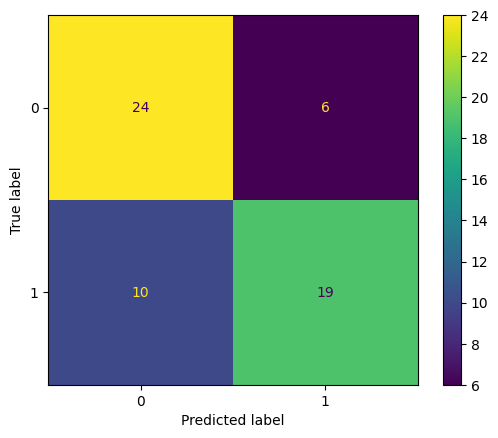

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt  

th = 0.5

y_pred = model.predict_proba(X_test)[:,1]
y_pred_c = model.predict_proba(X_test)[:,1]

for i in range(len(y_pred_c)):
    if y_pred_c[i] >= th:
        y_pred_c[i] = 1
    else:
        y_pred_c[i] = 0

y_test = y_test

print('------------------------------------TESTING INFO-------------------------------------------------')
# Метрики которые вы считаете важными
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')
print(f'accuracy on test - {accuracy_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()